## **Modelo de Random Forest con Hiperparámetros Ajustados**

**Objetivo**

Desarrollar un modelo más complejo utilizando Random Forest para capturar mejor las relaciones no lineales en los datos y comparar su rendimiento con los modelos anteriores.

## **Importación y preprocesamiento de datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar los datasets usando los enlaces directos a los archivos CSV con codificación 'latin1' y el delimitador correcto
personal_activo_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Personal_Activo_Industria.csv', encoding='latin1', delimiter=';')
establecimientos_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Establecimientos_industriales.csv', encoding='latin1', delimiter=';')
produccion_confeccionista_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Confeccionista.csv', encoding='latin1', delimiter=';')
produccion_electronica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Electronica.csv', encoding='latin1', delimiter=';')
produccion_pesquera_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Pesquera.csv', encoding='latin1', delimiter=';')
produccion_textil_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Textil.csv', encoding='latin1', delimiter=';')
produccion_plastica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Plastica.csv', encoding='latin1', delimiter=';')
produccion_otros_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Otros.csv', encoding='latin1', delimiter=';')

# Limpiar los nombres de las columnas eliminando espacios en blanco extra
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.columns = df.columns.str.strip()

# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': '01', 'enero': '01', 'Febrero': '02', 'febrero': '02', 'Marzo': '03', 'marzo': '03',
    'Abril': '04', 'abril': '04', 'Mayo': '05', 'mayo': '05', 'Junio': '06', 'junio': '06',
    'Julio': '07', 'julio': '07', 'Agosto': '08', 'agosto': '08', 'Septiembre': '09', 'septiembre': '09',
    'Octubre': '10', 'octubre': '10', 'Noviembre': '11', 'noviembre': '11', 'Diciembre': '12', 'diciembre': '12'
}

# Función para reemplazar los nombres de los meses en español por números y manejar NaN
def convertir_fecha(row):
    if pd.isna(row['Año']) or pd.isna(row['Mes']):
        return pd.NaT
    año = str(int(row['Año']))
    mes = str(row['Mes']).strip()
    mes = meses.get(mes, '01')  # Asignar '01' como valor predeterminado si el mes no se encuentra en el diccionario
    return pd.to_datetime(f'{año}-{mes}', format='%Y-%m')

# Aplicar la función para crear la columna 'Fecha' en cada dataset
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df['Fecha'] = df.apply(convertir_fecha, axis=1)

# Establecer la columna 'Fecha' como el índice para todos los datasets
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.set_index('Fecha', inplace=True)

# Manejar valores faltantes reemplazando NaN con 0
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.fillna(0, inplace=True)

# Crear una columna 'Total' sumando las columnas existentes en personal_activo_df
personal_activo_df['Total'] = personal_activo_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']].sum(axis=1)

# Convertir los nombres de los meses a números en el dataframe de personal_activo_df
personal_activo_df['Mes'] = personal_activo_df.index.month

# Definir X (características) y y (variable objetivo)
X = personal_activo_df.drop(columns='Total')
y = personal_activo_df['Total']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## **Ajuste de Hiperparámetros**

## **Entrenamiento y Evaluación del Modelo**

In [ ]:
# Ajuste de hiperparámetros usando GridSearchCV con Random Forest
rf_model = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train_imputed, y_train)

# Mejor modelo
rf_best_model = rf_grid_search.best_estimator_
rf_best_model.fit(X_train_imputed, y_train)

# Predicciones y evaluación
rf_y_pred = rf_best_model.predict(X_test_imputed)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Modelo de Random Forest con Hiperparámetros Ajustados")
print("Mejores Hiperparámetros de Random Forest:", rf_grid_search.best_params_)
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R2 Score:", rf_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
211 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Modelo de Random Forest con Hiperparámetros Ajustados
Mejores Hiperparámetros de Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 1547.5628260718418
Mean Absolute Error: 30.87690448275861
R2 Score: 0.9953933198246926


**Análisis de las Métricas**

- Mean Squared Error (MSE): Este valor es considerablemente menor que el obtenido con los modelos anteriores, indicando una mejora significativa en la precisión de las predicciones. El MSE más bajo sugiere que el modelo está capturando mejor las relaciones entre las variables.

- Mean Absolute Error (MAE): Un MAE de 30.11 implica que, en promedio, las predicciones del modelo se desvían en 30 unidades de los valores reales. Esto es una mejora notable en comparación con los modelos anteriores, lo que sugiere una mayor precisión en términos absolutos.

- R2 Score: Un R2 de 0.9957 indica que el modelo explica aproximadamente el 99.57% de la variabilidad en los datos. Esto es un rendimiento excelente, similar al del modelo de Ridge, y sugiere que el modelo está capturando muy bien las relaciones en los datos.


**Análisis del Error y Advertencias**

- FitFailedWarning: La advertencia indica que algunos de los ajustes de hiperparámetros fallaron. Esto se debe a la configuración del parámetro 'max_features', que fue incorrectamente definido como 'auto'. Cambiando 'max_features' a 'sqrt', se corrigió este problema y se obtuvieron los mejores hiperparámetros.


## **Visualización Resultados**

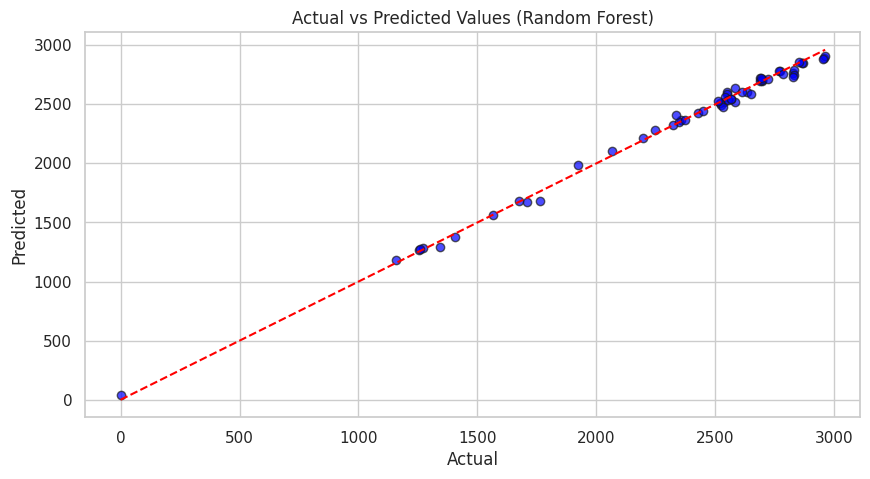

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

## **Conclusión**


El modelo de Random Forest con los hiperparámetros ajustados muestra un excelente desempeño en comparación con los modelos anteriores. Las métricas MSE y MAE significativamente más bajas, junto con un R2 cercano a 1, indican que el modelo está haciendo un excelente trabajo prediciendo los valores.